# Scraped Positions API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedPositionsAPI/Scraped%20Positions%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Positions API

The goal of Scraped Positions API is to collect and return scraped positions by the given filters. This can be done by using the `ScrapedPositionsAPI` class and calling appropriate methods

#### 1. Request by filters

Positions can be retrieved for specific filters, by calling the `get_positions` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`position_ids` List of PositionIDs to retrieve

`imos` List of IMOs

`message_ids` List of MessageIDs

`external_message_ids` List of  ExternalMessageIDs

`received_date_from` Earliest date the position received

`received_date_to` Latest date the position received

`updated_date_from` Earliest date the position updated

`updated_date_to` Latest date the position updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format

#### 2. Request by page token

Positions can also be retrieved, by calling the `get_positions_incremental` method.
This method will also return `next_request_token`, which the user should use to their next incremental request to retrieve only the latest updated cargoes.

#### Required

`vessel_type` The vessel type

#### Optional

`page_token` The key that should be used as a parameter of the token to retrieve the relevant page.

#### 3. Retrieve page token

The token referenced above can be retrieved for a specific date, by calling the `get_positions_incremental_token` method with the following argument:
#### Required

`updated_date_from` Earliest the position updated.

### Additional optional arguments

Methods `get_positions` and `get_positions_incremental`, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_deadweight, scraped_year_built, scraped_open_date, scraped_open_port, scraped_commercial_operator, scraped_cargo_type, scraped_last_cargo_types
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
open_name, open_taxonomy, commercial_operator, cargo_type, cargo_type_group, last_cargo_types
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for all the optional arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_positions import ScrapedPositionsAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedPositionsAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedPositionsAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker positions received the last 4 days, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(days=4)

And then call `get_positions` method, as below

In [6]:
scraped_positions = api.get_positions(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_positions), None)

ScrapedPosition(position_id=280995305, message_id=69566610, external_message_id=None, parsed_part_id=74684036, line_from=5, line_to=5, source='Email', updated_date=datetime.datetime(2024, 7, 29, 8, 58, 8, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 29, 8, 56, 1, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name='BLUE SKY I', scraped_deadweight='38402mts', scraped_year_built=None, imo=9335903, vessel_name='Blue Sky I', deadweight=38402, year_built=2006, liquid_capacity=43744, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=89, vessel_class='MR1', scraped_open_date='05/Aug', open_date_from=datetime.datetime(2024, 8, 5, 0, 0, tzinfo=datetime.timezone.utc), open_date_to=datetime.datetime(2024, 8, 5, 0, 0, tzinfo=datetime.timezone.utc), scraped_open_port='Chittagong', open_geo_id=3215, open_name='Chittagong', open_taxonomy_id=2, open_taxonomy='Port', scraped_commercial_operator=None, commercial_operator_id=None, co

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_positions)

df.head()

,position_id,message_id,external_message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,...,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,subject,sender,is_private
0,280995305,69566610,None,74684036,5,5,Email,2024-07-29 08:58:08+00:00,2024-07-29 08:56:01+00:00,False,...,False,False,False,False,False,True,Vessel: M/T BLUE SKY I dwt 38402mts open Chit...,Harper Petersen Albis - Special Vessel Positio...,harperpetersen.com,True
1,280996508,69568756,None,74685478,99,99,Email,2024-07-29 09:08:29+00:00,2024-07-29 09:07:57+00:00,False,...,False,False,False,False,False,False,grand winner 5 50 52 21 mackay 09/08 pan ocean...,BRS CPP MR LIST BSS YOSU - 29/07/24,BRS Group,True
2,280996509,69568756,None,74685478,21,21,Email,2024-07-29 09:08:29+00:00,2024-07-29 09:07:57+00:00,False,...,False,False,True,False,False,False,grand winner 2 49 52 21 mackay 22/07 pan ocean...,BRS CPP MR LIST BSS YOSU - 29/07/24,BRS Group,True
3,280996510,69568756,None,74685478,110,110,Email,2024-07-29 09:08:29+00:00,2024-07-29 09:07:57+00:00,False,...,False,False,False,False,False,False,grand winner 3 49 52 21 tauranga 08/08 pan oce...,BRS CPP MR LIST BSS YOSU - 29/07/24,BRS Group,True
4,280996511,69568756,None,74685478,75,75,Email,2024-07-29 09:08:29+00:00,2024-07-29 09:07:57+00:00,False,...,False,False,False,False,False,False,nomiki 44 42 02 pulau laut 05/08 unknown go - ...,BRS CPP MR LIST BSS YOSU - 29/07/24,BRS Group,True


#### Request by IMOs

To get positions for specific vessel(s) by their IMO number(s), you can simple call the `get_positions` method for a list of desired IMO(s)

Adding some date argument is always feasible

In [8]:
imos = [9321720,9385192,9325049,9406013,9645437]  # Or add a list of your desired IMOs

scraped_positions_by_imos = api.get_positions(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_positions_by_imos)
df_by_imos.head()

,position_id,message_id,external_message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,...,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,subject,sender,is_private
0,281075434,69600287,None,74706024,10,10,Email,2024-07-29 12:55:06+00:00,2024-07-29 12:54:33+00:00,False,...,False,False,False,False,False,False,30/07 aegean vision arcadia 158 17 dty 29/07 a...,SIDI KERIR SUEZMAX POSITIONS LIST 29TH JUL 2024,Bravo Tankers,True
1,281075440,69600287,None,74706024,42,42,Email,2024-07-29 12:55:06+00:00,2024-07-29 12:54:33+00:00,False,...,False,False,False,False,False,False,09/08 pinnacle spirit teekay 159 08 dty 29/07 ...,SIDI KERIR SUEZMAX POSITIONS LIST 29TH JUL 2024,Bravo Tankers,True
2,281139185,69611578,None,74714401,56,56,Email,2024-07-29 15:01:49+00:00,2024-07-29 14:59:22+00:00,False,...,False,False,False,False,False,False,14-aug pinnacle spirit 160 08 wilhelmshaven 29...,GALBRAITHS SUEZMAX LIST BASIS USG,Ifchor Galbraiths,True
3,281139194,69611578,None,74714401,7,7,Email,2024-07-29 15:01:49+00:00,2024-07-29 14:59:22+00:00,False,...,True,False,False,False,False,False,2-aug cape benat 157 10 houston 2-aug maersk proj,GALBRAITHS SUEZMAX LIST BASIS USG,Ifchor Galbraiths,True
4,281161463,69615532,None,74717700,69,69,Email,2024-07-29 16:03:05+00:00,2024-07-29 16:00:47+00:00,False,...,False,False,False,False,False,False,16-aug pinnacle spirit 159 08 wilhelmshaven 29...,MJLF USG SUEZMAX POSITIONS,MJLF,False


#### Request by Message or ExternalMessage IDs

To retrieve positions for particular message ID(s), you should include an extra parameter called `message_ids` when using the `get_positions` method. This parameter should contain a list of message IDs. For instance,

In [9]:
message_ids = [47238320,47244008,47244573,69350262,69348062]
scraped_positions_by_message_ids = api.get_positions(
    vessel_type=vessel_type,
    message_ids=message_ids,
)

next(iter(scraped_positions_by_message_ids), None)

ScrapedPosition(position_id=231186063, message_id=47238320, external_message_id=None, parsed_part_id=58295114, line_from=75, line_to=75, source='Email', updated_date=datetime.datetime(2023, 9, 11, 13, 40, 25, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2023, 9, 11, 13, 36, 39, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name='t.kurucesme', scraped_deadweight='105', scraped_year_built='15', imo=9692478, vessel_name='T. Kurucesme', deadweight=105171, year_built=2015, liquid_capacity=116922, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=86, vessel_class='Aframax', scraped_open_date='28/09', open_date_from=datetime.datetime(2023, 9, 28, 0, 0, tzinfo=datetime.timezone.utc), open_date_to=datetime.datetime(2023, 9, 28, 0, 0, tzinfo=datetime.timezone.utc), scraped_open_port='milazzo', open_geo_id=3557, open_name='Milazzo', open_taxonomy_id=2, open_taxonomy='Port', scraped_commercial_operator='ditas', commercial_operator_id=

You can achieve a similar result for external message IDs by providing an argument called `external_message_ids`.

#### Request by Position IDs

In the same manner, to get data for specific position ID(s), you must call the `get_positions` method for a list of desired position ID(s)

Date arguments are not available in this method

In [10]:
position_ids = [182459667,182459702,182624943,182624998,182508037]  # Or add a list of your desired position IDs

scraped_positions_by_ids = api.get_positions(
    vessel_type=vessel_type,
    position_ids=position_ids,
)

df_by_ids = pd.DataFrame(scraped_positions_by_ids)
df_by_ids.head()

,position_id,message_id,external_message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,...,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,subject,sender,is_private
0,182459667,30791168,None,45785098,21,21,Email,2022-11-17 11:57:58+00:00,2022-11-17 11:54:41+00:00,False,...,False,False,False,False,False,False,"20/11 SEASHARK 32 178 37,947 11.00 GER 04 ...",SIMPSON|SPENCE|YOUNG LTD – HANDY LIST (BASIS M...,SSY,False
1,182459702,30791168,None,45785098,59,59,Email,2022-11-17 11:57:58+00:00,2022-11-17 11:54:41+00:00,False,...,False,False,False,False,False,False,"27/11 MOUNT OLYMPUS 40 182 42,241 11.97 MAR...",SIMPSON|SPENCE|YOUNG LTD – HANDY LIST (BASIS M...,SSY,False
2,182508037,30800115,None,45793950,27,27,Email,2022-11-17 15:27:04+00:00,2022-11-17 15:23:16+00:00,False,...,False,False,False,False,False,False,ardmore exporter 49 52 14 yabucoa 19/11 ardmor...,MJLF MR LIST BSS HOUSTON NOV 17,MJLF,False
3,182624943,30849799,None,45839901,88,88,Email,2022-11-18 16:58:54+00:00,2022-11-18 16:55:19+00:00,False,...,False,False,False,False,False,False,14-dec advantage spice 156 10 48.1 rotterdam 2...,MJLF USG SUEZMAX POSITIONS,MJLF,False
4,182624998,30849799,None,45839901,12,12,Email,2022-11-18 16:58:54+00:00,2022-11-18 16:55:19+00:00,False,...,True,False,False,False,False,False,26-nov proj eagle san pedro 157 12 49.0 off ga...,MJLF USG SUEZMAX POSITIONS,MJLF,False


#### Retrieve incremental token
The `get_positions_incremental_token` allows retrieval of `page_token` by adding the `updated_date_from` value.
This `page_token` can be used as a variable to the `get_positions_incremental` method, in order to retrieve only new or updated positions.


For instance, to retrieve the relevant page token for last 3 days' data, you must call the `get_positions_incremental_token`, as below

In [11]:
updated_date_from = datetime.utcnow() - timedelta(days=3)
page_token = api.get_positions_incremental_token(
    updated_date_from=updated_date_from,
)

page_token

'MjAyNC0wNy0zMFQwODo1MDoxOC4wMDBa'

#### Request by page token

If the `page_token` parameter is not specified, the `get_positions_incremental` method will retrieve all positions. You can call the `get_positions_incremental` method, as below



In [12]:
scraped_positions_incremental = api.get_positions_incremental(
    vessel_type=vessel_type,
    page_token=page_token,
)

df_by_ids = pd.DataFrame(scraped_positions_incremental.data)
df_by_ids.head()

,position_id,message_id,external_message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,...,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,subject,sender,is_private
0,281297965,69693869,None,74767967.0,43.0,43.0,Email,2024-07-30 09:15:14+00:00,2024-07-30 09:12:43+00:00,False,...,True,False,False,False,False,False,15/08 ncc danah 46 183 52590 12.17 sau 11 gibr...,SSY – MR LIST (BASIS MALTA) – TUESDAY 30TH JUL...,SSY,False
1,281297976,69693869,None,74767967.0,45.0,45.0,Email,2024-07-30 09:15:14+00:00,2024-07-30 09:12:43+00:00,False,...,False,False,False,False,False,False,20/08 uog constantine g 50 183 53879 13.14 lib...,SSY – MR LIST (BASIS MALTA) – TUESDAY 30TH JUL...,SSY,False
2,281297977,69693869,None,74767967.0,40.0,40.0,Email,2024-07-30 09:15:14+00:00,2024-07-30 09:12:43+00:00,False,...,False,False,False,False,True,False,14/08 arvin 47 183 53184 12.22 lib 08 gaeta 13...,SSY – MR LIST (BASIS MALTA) – TUESDAY 30TH JUL...,SSY,False
3,281297978,69693869,None,74767967.0,39.0,39.0,Email,2024-07-30 09:15:14+00:00,2024-07-30 09:12:43+00:00,False,...,False,False,False,False,True,False,14/08 hakata princess 50 183 56949 13.10 pan 1...,SSY – MR LIST (BASIS MALTA) – TUESDAY 30TH JUL...,SSY,False
4,281297979,69693869,None,74767967.0,32.0,32.0,Email,2024-07-30 09:15:14+00:00,2024-07-30 09:12:43+00:00,False,...,False,False,False,False,False,False,11/08 avax 50 183 53658 13.32 mar 23 gibraltar...,SSY – MR LIST (BASIS MALTA) – TUESDAY 30TH JUL...,SSY,False


Also, the `get_positions_incremental` method will retrieve the `next_request_token`, which should be used as the `page_token` for the next incremental call and retrieve only new or updated positions.

In [13]:
next_request_token = scraped_positions_incremental.next_request_token

next_request_token

'MjAyNC0wOC0wMlQwODo1MDoxOC45MDha'

#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [14]:
scraped_mapped_columns = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_deadweight',
    'deadweight',
    'scraped_commercial_operator',
    'commercial_operator',
    'scraped_open_port',
    'open_name',
]

scraped_mapped_df = pd.DataFrame(scraped_positions, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_vessel_name,vessel_name,scraped_deadweight,deadweight,scraped_commercial_operator,commercial_operator,scraped_open_port,open_name
0,BLUE SKY I,Blue Sky I,38402mts,38402.0,None,None,Chittagong,Chittagong
1,grand winner,None,50,NaN,pan ocean,Pan Ocean,mackay,Mackay
2,grand winner,None,49,NaN,pan ocean,Pan Ocean,mackay,Mackay
3,grand winner,None,49,NaN,pan ocean,Pan Ocean,tauranga,Tauranga
4,nomiki,Nomiki,44,44485.0,unknown,None,pulau laut,Tanjung Pemancingan


## Examples

Let's start by fetching all tanker positions received the last week

In [15]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_positions = api.get_positions(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped positions

The `is_deleted` property of a scraped position indicates whether it is valid or not. If it is set to `True`, the corresponding `position_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped positions in the following examples.

In [16]:
example_scraped_positions = [position for position in example_scraped_positions if not position.is_deleted]

next(iter(example_scraped_positions), None)

ScrapedPosition(position_id=280874923, message_id=69455617, external_message_id=None, parsed_part_id=74607938, line_from=21, line_to=21, source='Email', updated_date=datetime.datetime(2024, 7, 26, 9, 30, 24, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 26, 9, 29, 39, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name='british sailor', scraped_deadweight='45', scraped_year_built='16', imo=9724673, vessel_name='British Sailor', deadweight=45999, year_built=2016, liquid_capacity=53838, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=88, vessel_class='MR2', scraped_open_date='01/08', open_date_from=datetime.datetime(2024, 8, 1, 0, 0, tzinfo=datetime.timezone.utc), open_date_to=datetime.datetime(2024, 8, 1, 0, 0, tzinfo=datetime.timezone.utc), scraped_open_port='lagos', open_geo_id=3683, open_name='Lagos', open_taxonomy_id=2, open_taxonomy='Port', scraped_commercial_operator=None, commercial_operator_id=None, commerc

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [17]:
example_columns = [
    'imo',
    'commercial_operator',
    'open_date_to',
    'open_name',
    'is_deleted',
]

data = pd.DataFrame(example_scraped_positions, columns=example_columns).astype({'imo': 'Int64'})

data.head()

,imo,commercial_operator,open_date_to,open_name,is_deleted
0,9724673,None,2024-08-01 00:00:00+00:00,Lagos,False
1,9682394,Vitol,2024-08-01 00:00:00+00:00,Walvis Bay,False
2,9465966,Torm,2024-08-04 00:00:00+00:00,Lome,False
3,9637076,Ardmore Shipping,2024-08-02 00:00:00+00:00,West Africa,False
4,9455741,Tankerska Plovidba,2024-08-01 00:00:00+00:00,Limboh,False


#### Top 10 Commercical Operators

In this example, we will find the top 10 Commercial Operators, based on the number of their vessels opening

In [18]:
top_co_ser = data[['commercial_operator', 'imo']].drop_duplicates().commercial_operator.value_counts().head(10)

top_co_df = top_co_ser.to_frame(name='VesselCount').reset_index().rename(columns={'index': 'CommercialOperator'})

top_co_df

,commercial_operator,VesselCount
0,Trafigura,107
1,Hafnia,93
2,Shell,78
3,Maersk,74
4,Torm,70
5,Vitol,66
6,Scorpio Commercial Management,64
7,Norden,58
8,Clearlake Shipping,56
9,Norden Tanker Pool,53


And display results in a bar plot

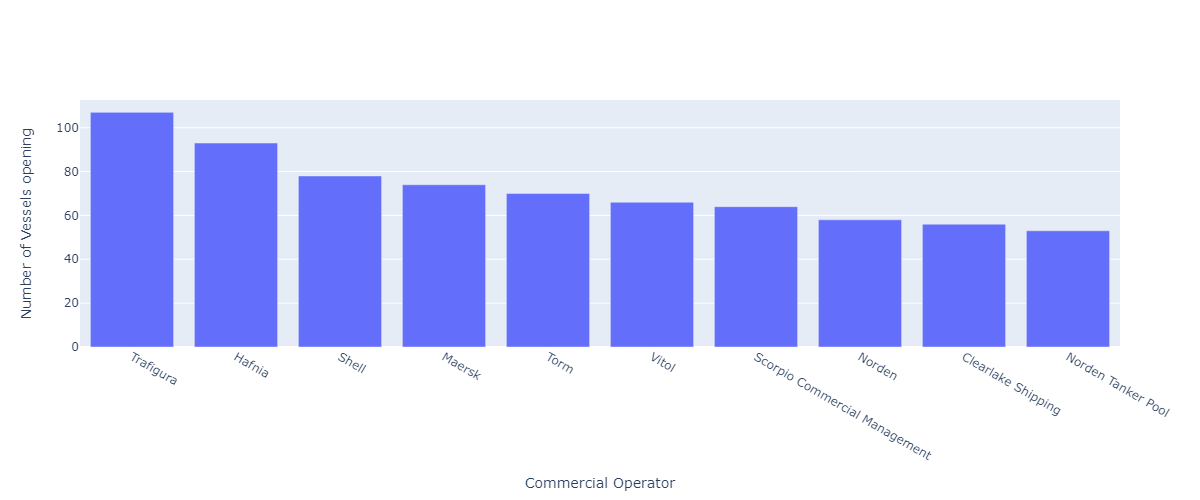

In [19]:
top_co_fig = go.Figure()

bar = go.Bar(
    x=top_co_df.commercial_operator.tolist(),
    y=top_co_df.VesselCount.tolist(),
)

top_co_fig.add_trace(bar)
top_co_fig.update_xaxes(title_text="Commercial Operator")
top_co_fig.update_yaxes(title_text="Number of Vessels opening")
top_co_fig.show()

#### Vessels opening at specific ports

In this example, we will create a visualization, for the number of distinct vessels opening at specific ports per day over the next week

In [20]:
this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')
ports = data[data.open_name.notna()].open_name.value_counts().head().index.tolist()

ports

['Singapore', 'US Gulf', 'New York', 'Fujairah', 'Rotterdam']

Create the pivot table

In [21]:
ports_mask = data.open_name.isin(ports) & data.open_date_to.isin(this_week_days)

df_ports = data[ports_mask]

df_pivot = pd.pivot_table(
    df_ports,
    columns='open_name',
    index='open_date_to',
    values='imo',
    aggfunc=pd.Series.nunique,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'open_date_to'})

df_pivot

open_name,open_date_to,Fujairah,New York,Rotterdam,Singapore,US Gulf
0,2024-08-02 00:00:00+00:00,23,13,10,33,17
1,2024-08-03 00:00:00+00:00,20,8,8,24,12
2,2024-08-04 00:00:00+00:00,12,3,9,17,14
3,2024-08-05 00:00:00+00:00,11,4,7,21,11
4,2024-08-06 00:00:00+00:00,10,4,5,22,7
5,2024-08-07 00:00:00+00:00,6,7,6,19,3
6,2024-08-08 00:00:00+00:00,8,3,5,25,3


And display the results as timeseries

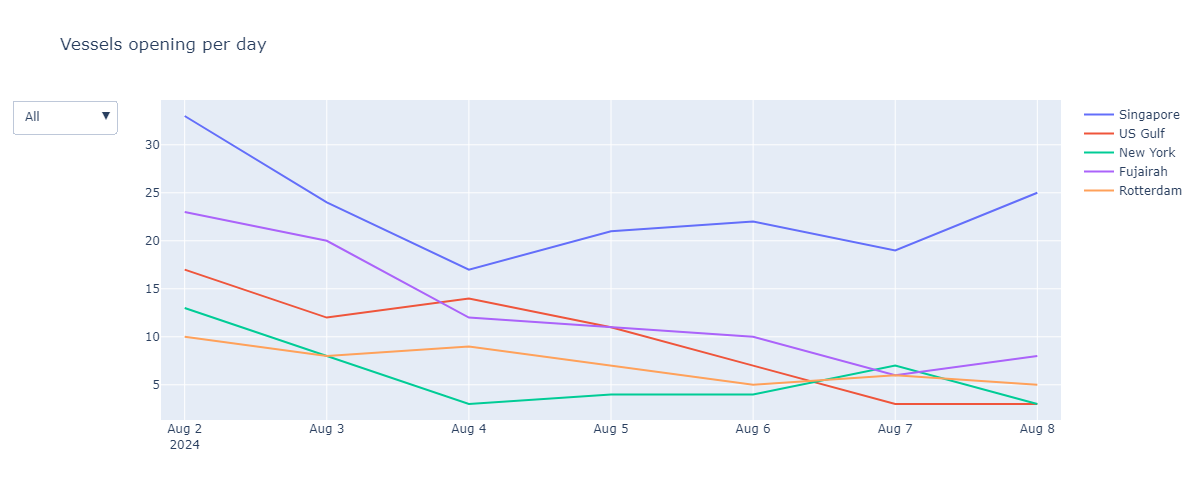

In [22]:
def port_button(port):
    args = [
        {'visible': [i == ports.index(port) for i in range(len(ports))]},
        {
            'title': f'Vessels opening at {port} per day',
            'showlegend': True
        },
    ]
    
    return dict(label=port,
          method='update',
          args=args,
        )

title = 'Vessels opening per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

ports_fig = go.Figure()

port_buttons = []

for port in ports:
    if port not in df_pivot.columns:
        continue
    port_scatter_plot = go.Scatter(    
        x=df_pivot.open_date_to,
        y=df_pivot[port],
        name=port,
        mode='lines',
    )

    ports_fig.add_trace(port_scatter_plot)
    
    port_buttons.append(port_button(port))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(ports))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *port_buttons,
])

ports_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

ports_fig.show()

#### Export data to csv

In [23]:
output_path = '' # Change output_path with your path
filename = 'last_week_positions.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)